# Recipes for Neural Networks

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
!rm -rf model/
!rm -rf ts_logs/
!rm -rf ts_outputs/

  Using cached https://files.pythonhosted.org/packages/23/10/c0b78c27298029e4454a472a1919bde20cb182dab1662cec7f2ca1dcc523/boto-2.49.0-py2.py3-none-any.whl


In [30]:
!pip install matplotlib

    100% |████████████████████████████████| 14.4MB 1.5MB/s 
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 122kB 4.7MB/s 


In [ ]:
!python mnist.py

This is the location TS has deposited data in

In [16]:
!ls ts_outputs/train/

collections.ts events         index


In [21]:
# import sys
# sys.path.append('../../../../tornasole_core')
from tornasole.trials import create_trial

# Create trial object from this path
tdir = "./ts_outputs/train"
tr = create_trial(tdir)

INFO:tornasole:Loading trial train at path ./ts_outputs/train
INFO:tornasole:Found 5 steps
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   47.3s remaining:  1.2min
[Parallel(n_jobs=4)]: Done   3 out of   5 | elapsed:  1.0min remaining:   40.7s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  1.6min finished
INFO:tornasole:Loaded 3 collections


In [24]:
ts = tr.tensors()

['input_olg/shape:0',
 'conv2d/BiasAdd:0',
 'gradients/conv2d_1/Conv2D_grad/ShapeN:0',
 'gradients/dropout/dropout/truediv_grad/RealDiv_2:0',
 'gradients/Reshape_grad/Shape:0',
 'GradientDescent/update_dense/bias/ApplyGradientDescent:0',
 'random_shuffle_queue_DequeueMany:1',
 'gradients/sparse_softmax_cross_entropy_loss/value_grad/Reshape:0',
 'gradients/sparse_softmax_cross_entropy_loss/xentropy/xentropy_grad/PreventGradient:0',
 'sparse_softmax_cross_entropy_loss/num_present/ones_like/Const:0',
 'sparse_softmax_cross_entropy_loss/num_present:0',
 'sparse_softmax_cross_entropy_loss/Const_1:0',
 'dropout/dropout/sub:0',
 'dense_1/BiasAdd:0',
 'gradients/sparse_softmax_cross_entropy_loss/Sum_grad/Const:0',
 'sparse_softmax_cross_entropy_loss/Sum:0',
 'gradients/sparse_softmax_cross_entropy_loss/Mul_grad/Shape:0',
 'dense_1/MatMul:0',
 'gradients/dropout/dropout/truediv_grad/mul:0',
 'gradients/conv2d/Conv2D_grad/Conv2DBackpropInput:0',
 'gradients/dense_1/MatMul_grad/tuple/control_depe

In [26]:
import re
for t in ts:
    if re.search('radient', t ):
        continue
    v = tr.tensor(t).value(0)
    
    if type(v)==bool:
        print( t, "is bool")
    elif v is None:
        print( t, "is None" )
    else:
        print(t, v.shape )
        
        

input_olg/shape:0 (4,)
conv2d/BiasAdd:0 (100, 28, 28, 64)
random_shuffle_queue_DequeueMany:1 (100, 28, 28)
sparse_softmax_cross_entropy_loss/num_present/ones_like/Const:0 (1,)
sparse_softmax_cross_entropy_loss/num_present:0 (1,)
sparse_softmax_cross_entropy_loss/Const_1:0 (1,)
dropout/dropout/sub:0 (1,)
dense_1/BiasAdd:0 (100, 10)
sparse_softmax_cross_entropy_loss/Sum:0 (1,)
dense_1/MatMul:0 (100, 10)
dropout/dropout/add:0 (100, 1024)
conv2d_1/kernel/read:0 (5, 5, 64, 64)
dropout/dropout/random_uniform/min:0 (1,)
random_shuffle_queue_DequeueMany:2 (100,)
sparse_softmax_cross_entropy_loss/xentropy/xentropy:0 (100,)
dropout/dropout/random_uniform:0 (100, 1024)
sparse_softmax_cross_entropy_loss/xentropy/xentropy:1 (100, 10)
conv2d/kernel/read:0 (5, 5, 1, 64)
conv2d_1/bias/read:0 (64,)
conv2d/Conv2D:0 (100, 28, 28, 64)
dropout/dropout/mul:0 (100, 1024)
dropout/dropout/random_uniform/mul:0 (100, 1024)
dense_1/kernel/read:0 (1024, 10)
conv2d/bias/read:0 (64,)
dropout/dropout/rate:0 (1,)
drop

In [52]:
imgs = tr.tensor('input_olg:0').value(0)
imgs.shape
a= imgs[0]
a = a[:,:,0]*255

In [53]:
import matplotlib.pyplot as plt

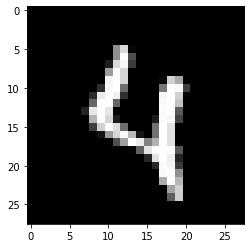

In [54]:
plt.imshow(a, cmap='gray')

